In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sl
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

In [2]:
 data = pd.read_csv(r'C:\Users\banga\OneDrive\Desktop\Internship\DATA SETS\Laptop Data.csv')

In [3]:
data.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [5]:
data.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [6]:
data.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Dell'),
  Text(1, 0, 'Lenovo'),
  Text(2, 0, 'HP'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Acer'),
  Text(5, 0, 'MSI'),
  Text(6, 0, 'Toshiba'),
  Text(7, 0, 'Apple'),
  Text(8, 0, 'Samsung'),
  Text(9, 0, 'Razer'),
  Text(10, 0, 'Mediacom'),
  Text(11, 0, 'Microsoft'),
  Text(12, 0, 'Xiaomi'),
  Text(13, 0, 'Vero'),
  Text(14, 0, 'Chuwi'),
  Text(15, 0, 'Google'),
  Text(16, 0, 'Fujitsu'),
  Text(17, 0, 'LG'),
  Text(18, 0, 'Huawei')])

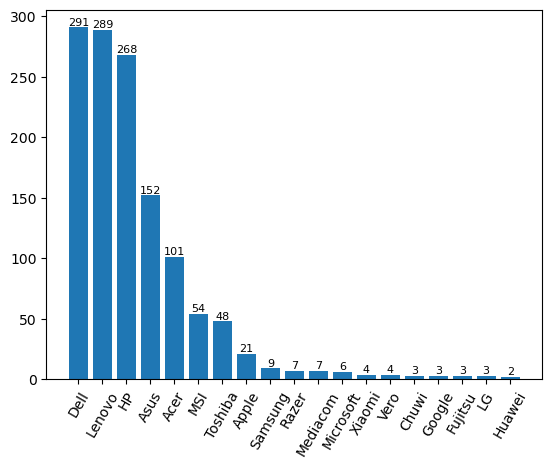

In [7]:
company_counts = data['Company'].value_counts()
fig,cx=plt.subplots()
bars=cx.bar(company_counts.index,company_counts.values)
cx.bar_label(bars,fontsize=8)
plt.xticks(rotation=60)

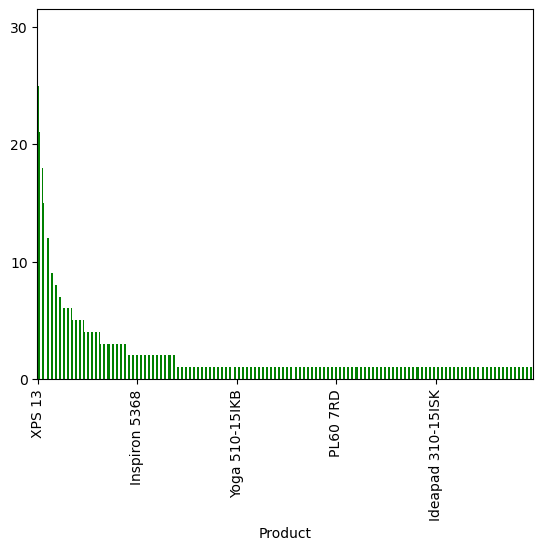

In [8]:
data['Product'].value_counts().plot(kind='bar',color='green')
plt.locator_params(nbins=5)

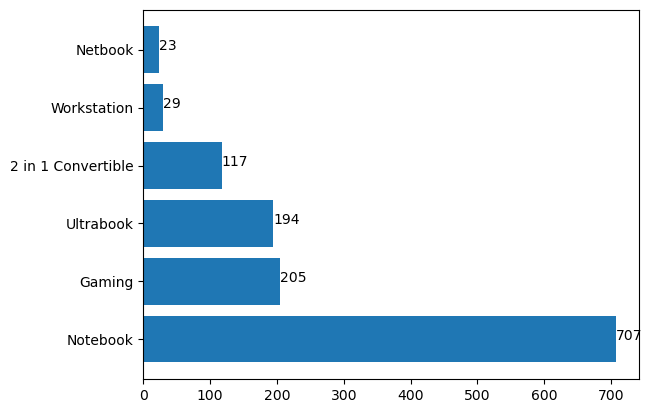

In [9]:
Typename = data['TypeName'].value_counts()
plt.barh(Typename.index,Typename.values)
for i,v in enumerate(Typename):
                     plt.text(v,i,str(v))
plt.show()

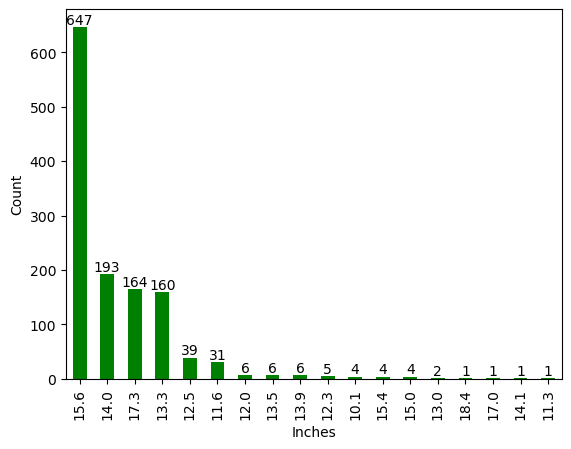

In [65]:
inches=data['Inches'].value_counts()
ix = inches.plot(kind='bar',color='green')
for p in ix.patches:
    ix.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.xlabel('Inches')
plt.ylabel('Count')
plt.show()

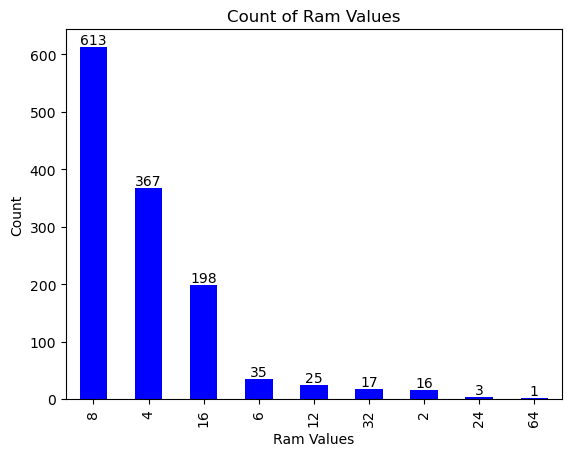

In [11]:
Ram_counts = data['Ram'].value_counts()
ax = Ram_counts.plot(kind='bar', color='blue')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.xlabel('Ram Values')
plt.ylabel('Count')
plt.title('Count of Ram Values')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Windows 10'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Linux'),
  Text(3, 0, 'Windows 7'),
  Text(4, 0, 'Chrome OS'),
  Text(5, 0, 'macOS'),
  Text(6, 0, 'Mac OS X'),
  Text(7, 0, 'Windows 10 S'),
  Text(8, 0, 'Android')])

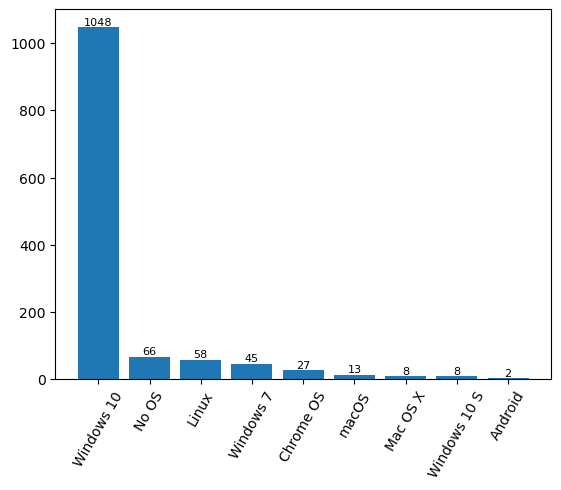

In [12]:
OS_counts = data['OS'].value_counts()
fig,Ox=plt.subplots()
bars = Ox.bar(OS_counts.index,OS_counts.values)
Ox.bar_label(bars,fontsize=8)
plt.xticks(rotation=60)

[Text(0, 0, '835'), Text(0, 0, '369'), Text(0, 0, '43'), Text(0, 0, '28')]

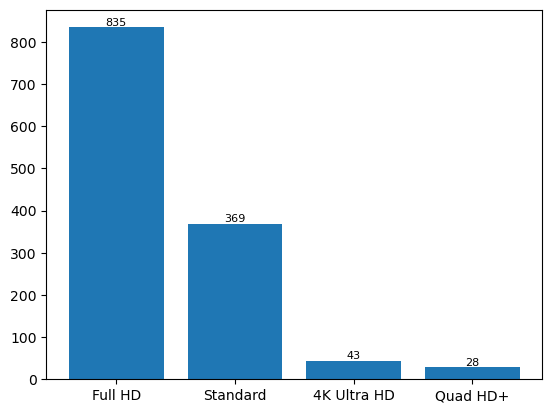

In [13]:
Screen_counts = data['Screen'].value_counts()
fig,SC=plt.subplots()
bars = SC.bar(Screen_counts.index,Screen_counts.values)
SC.bar_label(bars,fontsize=8)
#plt.xticks(rotation=60)

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

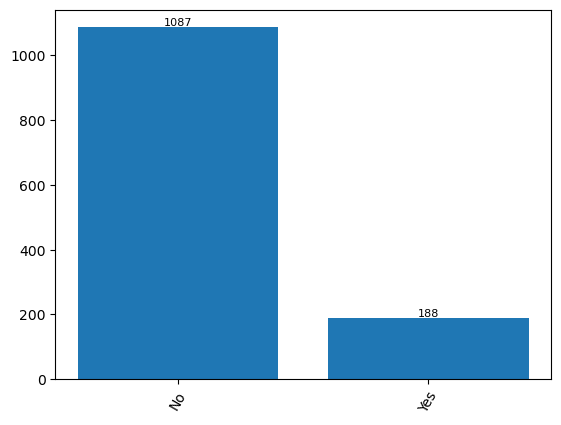

In [14]:
Touch_counts = data['Touchscreen'].value_counts()
fig,Tx=plt.subplots()
bars = Tx.bar(Touch_counts.index,Touch_counts.values)
Tx.bar_label(bars,fontsize=8)
plt.xticks(rotation=60)

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

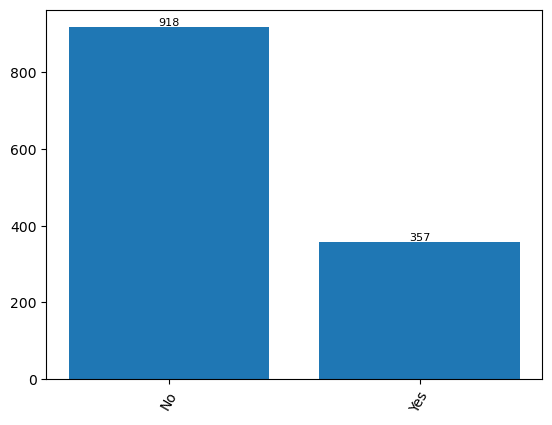

In [15]:
IPSpanel_counts = data['IPSpanel'].value_counts()
fig,Ix=plt.subplots()
bars = Ix.bar(IPSpanel_counts.index,IPSpanel_counts.values)
Ix.bar_label(bars,fontsize=8)
plt.xticks(rotation=60)

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

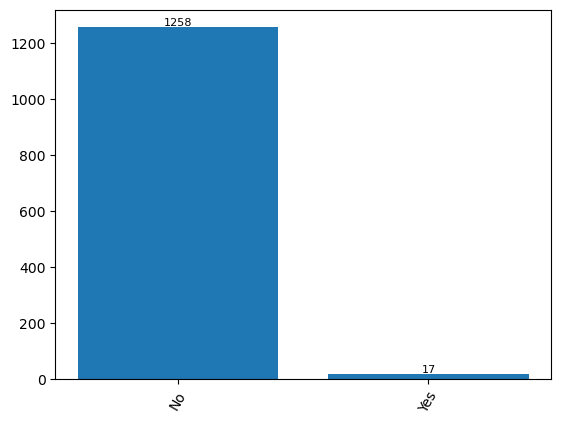

In [16]:
Retina_counts = data['RetinaDisplay'].value_counts()
fig,RDx=plt.subplots()
bars = RDx.bar(Retina_counts.index,Retina_counts.values)
RDx.bar_label(bars,fontsize=8)
plt.xticks(rotation=60)

([0, 1, 2], [Text(0, 0, 'Intel'), Text(1, 0, 'AMD'), Text(2, 0, 'Samsung')])

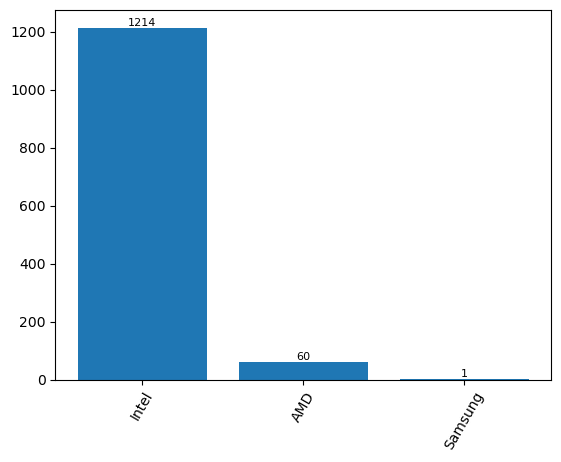

In [17]:
CPU_company = data['CPU_company'].value_counts()
fig,CCx=plt.subplots()
bars = CCx.bar(CPU_company.index,CPU_company.values)
CCx.bar_label(bars,fontsize=8)
plt.xticks(rotation=60)

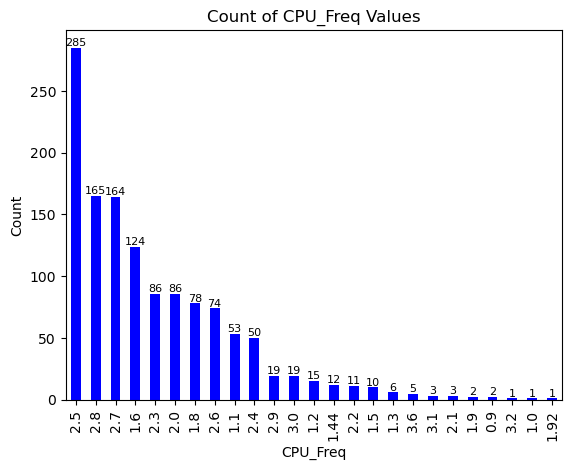

In [18]:
CPU_Freq = data['CPU_freq'].value_counts()
CF = CPU_Freq.plot(kind='bar', color='blue')
for p in CF.patches:
    CF.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom',fontsize=8)
plt.xlabel('CPU_Freq')
plt.ylabel('Count')
plt.title('Count of CPU_Freq Values')
plt.show()

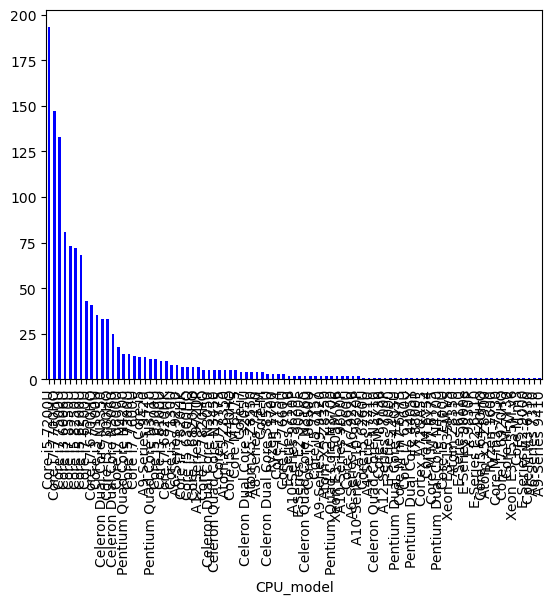

In [19]:
CPU_Model = data['CPU_model'].value_counts().plot(kind='bar', color='blue')

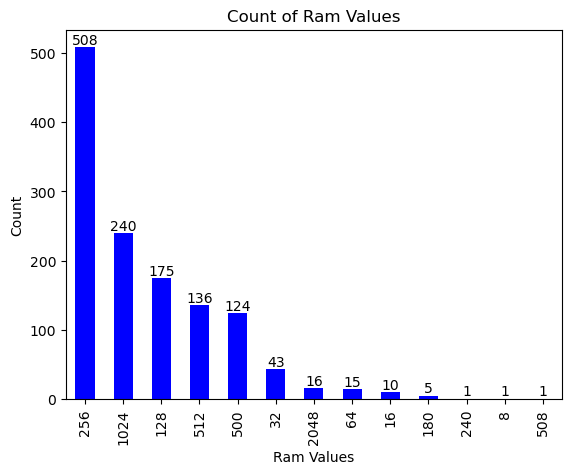

In [20]:
Primary_storage = data['PrimaryStorage'].value_counts()
ax = Primary_storage.plot(kind='bar', color='blue')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.xlabel('Ram Values')
plt.ylabel('Count')
plt.title('Count of Ram Values')
plt.show()

([0, 1, 2, 3],
 [Text(0, 0, 'SSD'),
  Text(1, 0, 'HDD'),
  Text(2, 0, 'Flash Storage'),
  Text(3, 0, 'Hybrid')])

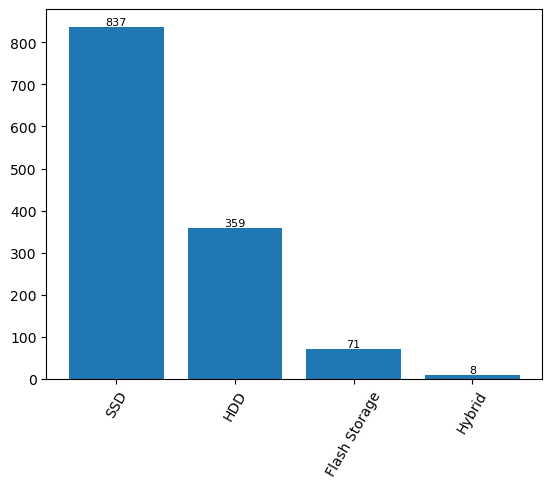

In [21]:
Primary_storage_Type = data['PrimaryStorageType'].value_counts()
fig,PST=plt.subplots()
bars = PST.bar(Primary_storage_Type.index,Primary_storage_Type.values)
PST.bar_label(bars,fontsize=8)
plt.xticks(rotation=60)

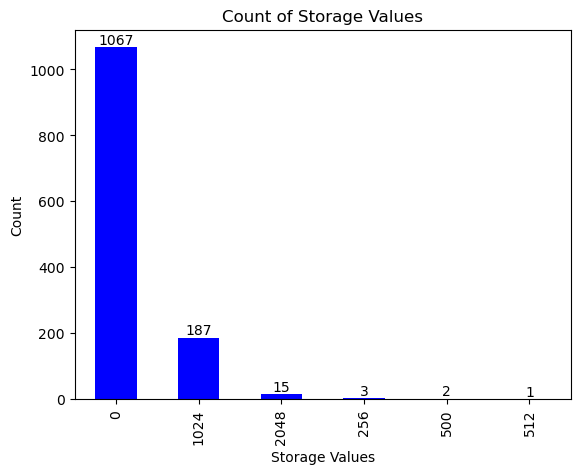

In [22]:
Secondary_Storage = data['SecondaryStorage'].value_counts()
ax = Secondary_Storage.plot(kind='bar', color='blue')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.xlabel('Storage Values')
plt.ylabel('Count')
plt.title('Count of Storage Values')
plt.show()

([0, 1, 2, 3],
 [Text(0, 0, 'No'),
  Text(1, 0, 'HDD'),
  Text(2, 0, 'SSD'),
  Text(3, 0, 'Hybrid')])

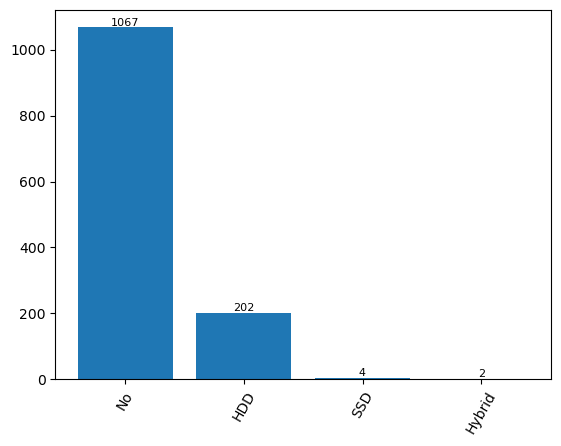

In [23]:
Secondary_Storage_Type = data['SecondaryStorageType'].value_counts()
fig,SST=plt.subplots()
bars = SST.bar(Secondary_Storage_Type.index,Secondary_Storage_Type.values)
SST.bar_label(bars,fontsize=8)
plt.xticks(rotation=60)

[Text(0, 0, '704'), Text(0, 0, '396'), Text(0, 0, '174'), Text(0, 0, '1')]

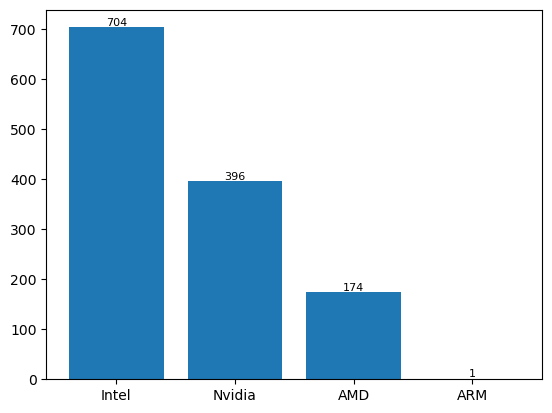

In [24]:
GPU_company = data['GPU_company'].value_counts()
fig,CC=plt.subplots()
bars = CC.bar(GPU_company.index,GPU_company.values)
CC.bar_label(bars,fontsize=8)

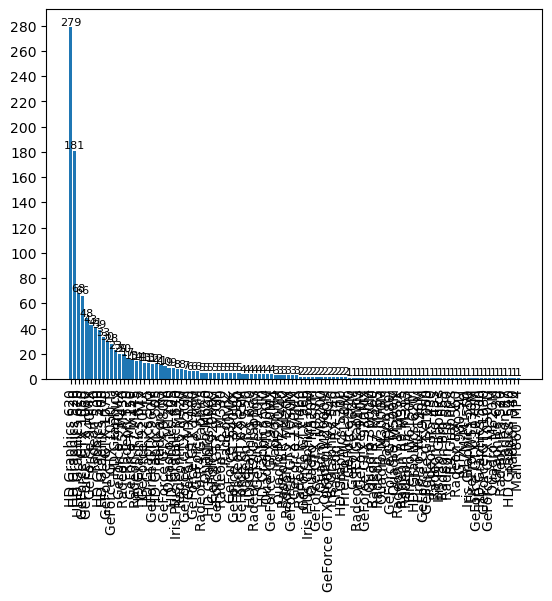

In [25]:
Gpu_Model = data['GPU_model'].value_counts()
fig,GM=plt.subplots()
bars = GM.bar(Gpu_Model.index,Gpu_Model.values)
GM.bar_label(bars,fontsize=8)
plt.xticks(rotation=90)
plt.locator_params(nbins=20)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Acer'),
  Text(1, 0, 'Apple'),
  Text(2, 0, 'Asus'),
  Text(3, 0, 'Chuwi'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Fujitsu'),
  Text(6, 0, 'Google'),
  Text(7, 0, 'HP'),
  Text(8, 0, 'Huawei'),
  Text(9, 0, 'LG'),
  Text(10, 0, 'Lenovo'),
  Text(11, 0, 'MSI'),
  Text(12, 0, 'Mediacom'),
  Text(13, 0, 'Microsoft'),
  Text(14, 0, 'Razer'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Toshiba'),
  Text(17, 0, 'Vero'),
  Text(18, 0, 'Xiaomi')])

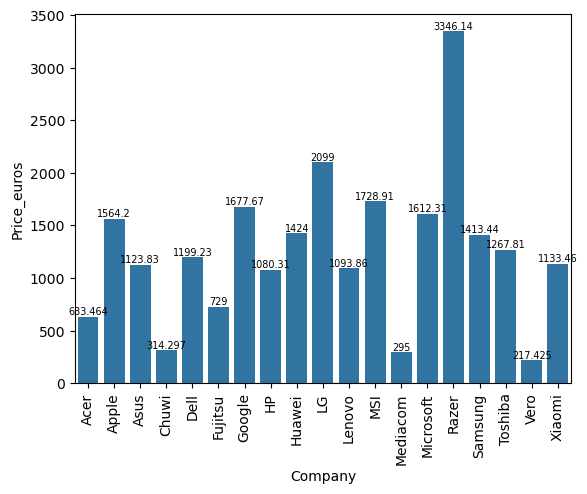

In [26]:
company = data.groupby(by='Company')['Price_euros'].mean().reset_index()
ax=sb.barplot(x='Company',y='Price_euros',data=company,errwidth=0)
ax.bar_label(ax.containers[0],fontsize=7)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '2 in 1 Convertible'),
  Text(1, 0, 'Gaming'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Notebook'),
  Text(4, 0, 'Ultrabook'),
  Text(5, 0, 'Workstation')])

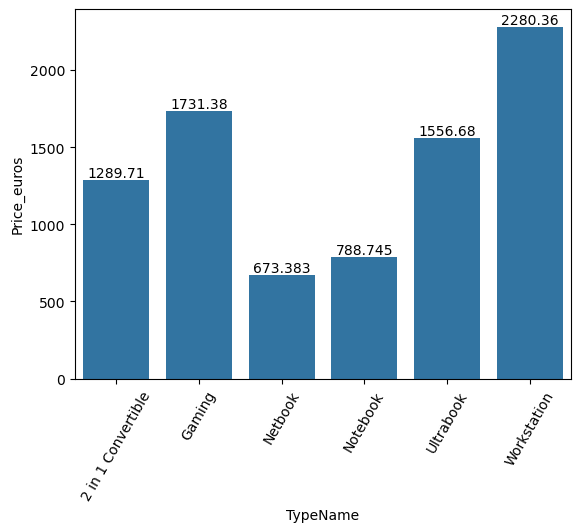

In [66]:
typename = data.groupby(by='TypeName')['Price_euros'].mean().reset_index()
ax=sb.barplot(x='TypeName',y='Price_euros',data=typename,errwidth=0)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=60)

[Text(0, 0, '247.634'),
 Text(0, 0, '576.109'),
 Text(0, 0, '619.357'),
 Text(0, 0, '1184.43'),
 Text(0, 0, '1239.44'),
 Text(0, 0, '1941.19'),
 Text(0, 0, '2206.33'),
 Text(0, 0, '3413.09'),
 Text(0, 0, '3975')]

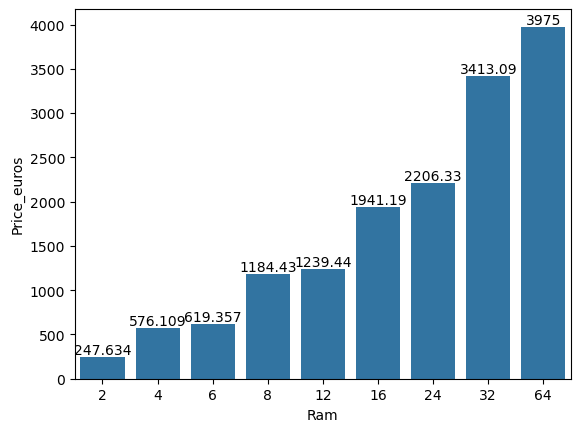

In [28]:
ram = data.groupby(by='Ram')['Price_euros'].mean().reset_index()
ax=sb.barplot(x='Ram',y='Price_euros',data=ram,errwidth=0)
ax.bar_label(ax.containers[0])

[Text(0, 0, '560.994'), Text(0, 0, '1163.73'), Text(0, 0, '659')]

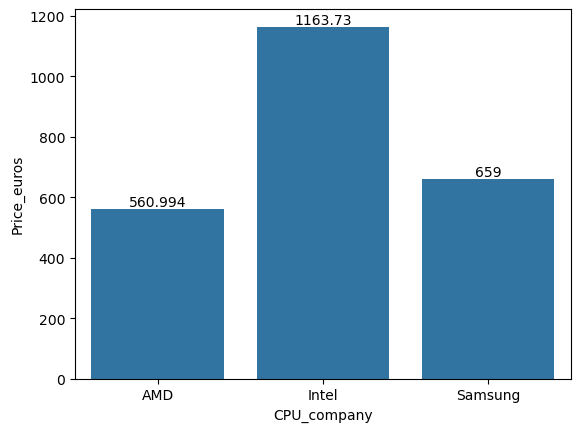

In [29]:
Cpu_Company = data.groupby(by='CPU_company')['Price_euros'].mean().reset_index()
ax=sb.barplot(x='CPU_company',y='Price_euros',data=Cpu_Company,errwidth=0)
ax.bar_label(ax.containers[0])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, '0.9'),
  Text(1, 0, '1.0'),
  Text(2, 0, '1.1'),
  Text(3, 0, '1.2'),
  Text(4, 0, '1.3'),
  Text(5, 0, '1.44'),
  Text(6, 0, '1.5'),
  Text(7, 0, '1.6'),
  Text(8, 0, '1.8'),
  Text(9, 0, '1.9'),
  Text(10, 0, '1.92'),
  Text(11, 0, '2.0'),
  Text(12, 0, '2.1'),
  Text(13, 0, '2.2'),
  Text(14, 0, '2.3'),
  Text(15, 0, '2.4'),
  Text(16, 0, '2.5'),
  Text(17, 0, '2.6'),
  Text(18, 0, '2.7'),
  Text(19, 0, '2.8'),
  Text(20, 0, '2.9'),
  Text(21, 0, '3.0'),
  Text(22, 0, '3.1'),
  Text(23, 0, '3.2'),
  Text(24, 0, '3.6')])

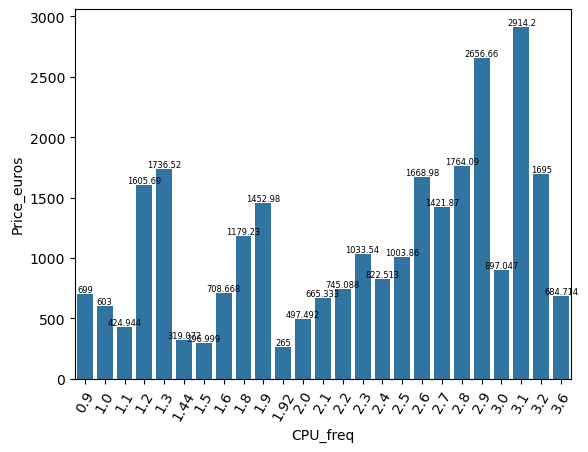

In [30]:
Cpu_Freq = data.groupby(by='CPU_freq')['Price_euros'].mean().reset_index()
ax=sb.barplot(x='CPU_freq',y='Price_euros',data=Cpu_Freq,errwidth=0)
ax.bar_label(ax.containers[0],fontsize=6)
plt.xticks(rotation=60)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92],
 [Text(0, 0, 'A10-Series 9600P'),
  Text(1, 0, 'A10-Series 9620P'),
  Text(2, 0, 'A10-Series A10-9620P'),
  Text(3, 0, 'A12-Series 9700P'),
  Text(4, 0, 'A12-Series 9720P'),
  Text(5, 0, 'A4-Series 7210'),
  Text(6, 0, 'A6-Series 7310'),
  Text(7, 0, 'A6-Series 9220'),
  Text(8, 0, 'A6-Series A6-9220'),
  Text(9, 0, 'A8-Series 7410'),
  Text(10, 0, 'A9-Series 9410'),
  Text(11, 0, 'A9-Series 9420'),
  Text(12, 0, 'A9-Series A9-9420'),
  Text(13, 0

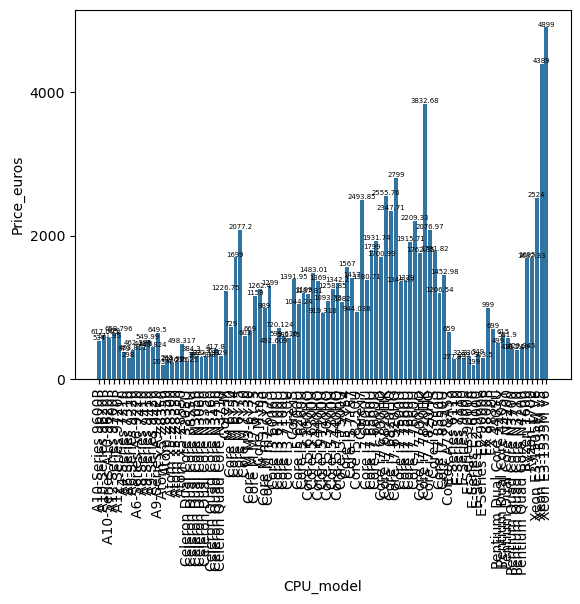

In [31]:
Cpu_Model = data.groupby(by='CPU_model')['Price_euros'].mean().reset_index()
ax=sb.barplot(x='CPU_model',y='Price_euros',data=Cpu_Model,errwidth=0)
ax.bar_label(ax.containers[0],fontsize=5)
plt.locator_params(nbins=5)
plt.xticks(rotation=90)

[Text(0, 0, '778.027'),
 Text(0, 0, '659'),
 Text(0, 0, '1020.37'),
 Text(0, 0, '1496.75')]

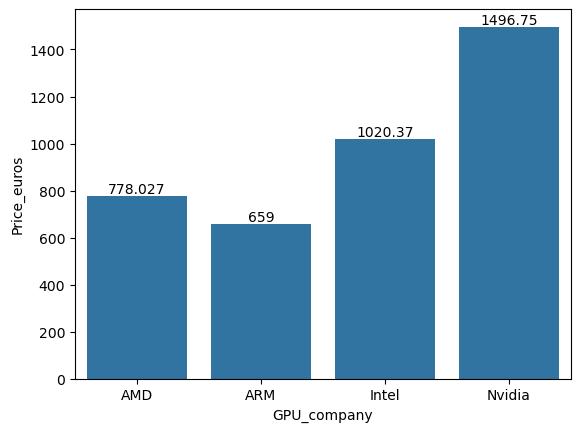

In [32]:
Gpu_Company = data.groupby(by='GPU_company')['Price_euros'].mean().reset_index()
ax=sb.barplot(x='GPU_company',y='Price_euros',data=Gpu_Company,errwidth=0)
ax.bar_label(ax.containers[0])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109],
 [Text(0, 0, 'FirePro W4190M'),
  Text(1, 0, 'FirePro W4190M '),
  Text(2, 0, 'FirePro W5130M'),
  Text(3, 0, 'FirePro W6150M'),
  Text(4, 0, 'GTX 980 SLI'),
  Text(5, 0, 'GeForce 150MX'),
  Text(6, 0, 'GeForce 920'),
  Text(7, 0, 'GeForce 920M'),
  Text(8, 0, 'GeForce 920MX'),
  Text(9, 0, 'GeForce 920MX '),
  Text(10, 0, 'GeForce 930M'

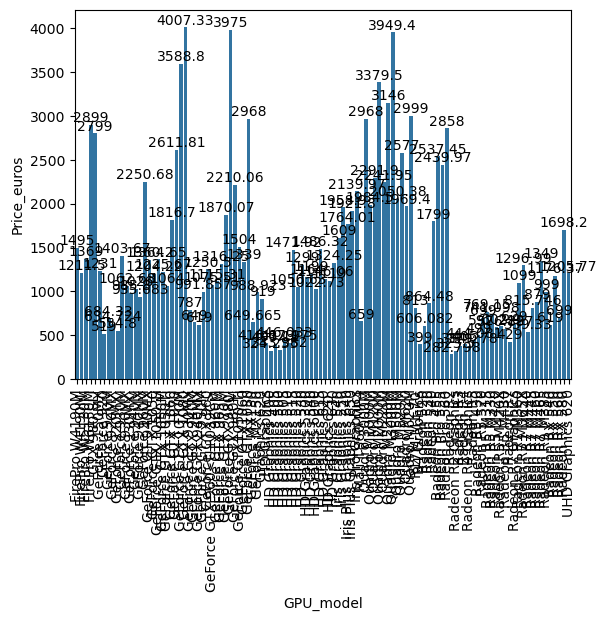

In [33]:
Gpu_Model = data.groupby(by='GPU_model')['Price_euros'].mean().reset_index()
ax=sb.barplot(x='GPU_model',y='Price_euros',data=Gpu_Model,errwidth=0)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)

[Text(0, 0, '2249'),
 Text(0, 0, '305.38'),
 Text(0, 0, '309.28'),
 Text(0, 0, '556.543'),
 Text(0, 0, '1011.28'),
 Text(0, 0, '1098.6'),
 Text(0, 0, '3100'),
 Text(0, 0, '1333.33'),
 Text(0, 0, '640.091'),
 Text(0, 0, '1002'),
 Text(0, 0, '1944.59'),
 Text(0, 0, '841.759'),
 Text(0, 0, '648.711')]

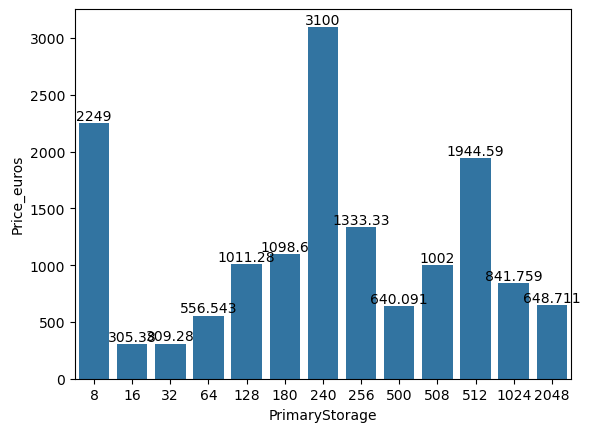

In [34]:
Primary_storage = data.groupby(by='PrimaryStorage')['Price_euros'].mean().reset_index()
ax=sb.barplot(x='PrimaryStorage',y='Price_euros',data=Primary_storage,errwidth=0)
ax.bar_label(ax.containers[0])

[Text(0, 0, '544.995'),
 Text(0, 0, '658.401'),
 Text(0, 0, '875.935'),
 Text(0, 0, '1391.9')]

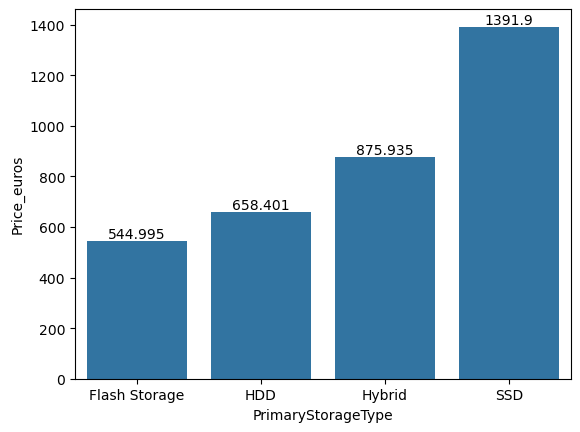

In [35]:
Primary_Storage_Type = data.groupby(by='PrimaryStorageType')['Price_euros'].mean().reset_index()
ax=sb.barplot(x='PrimaryStorageType',y='Price_euros',data=Primary_Storage_Type,errwidth=0)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1040.4'),
 Text(0, 0, '1394.99'),
 Text(0, 0, '1497.17'),
 Text(0, 0, '1499'),
 Text(0, 0, '1633.37'),
 Text(0, 0, '1524.14')]

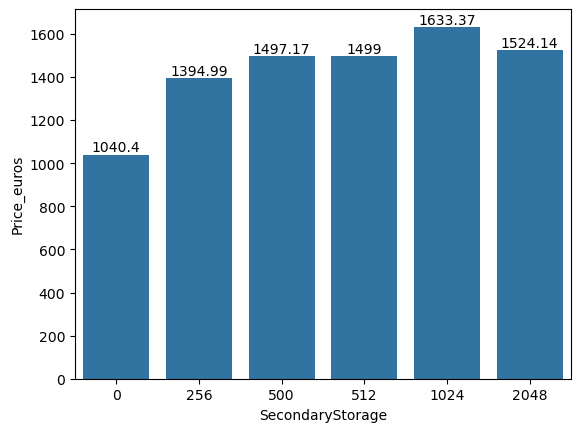

In [36]:
Secondary_Storage = data.groupby(by='SecondaryStorage')['Price_euros'].mean().reset_index()
ax=sb.barplot(x='SecondaryStorage',y='Price_euros',data=Secondary_Storage,errwidth=0)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1610.42'),
 Text(0, 0, '2994.99'),
 Text(0, 0, '1040.4'),
 Text(0, 0, '1420.99')]

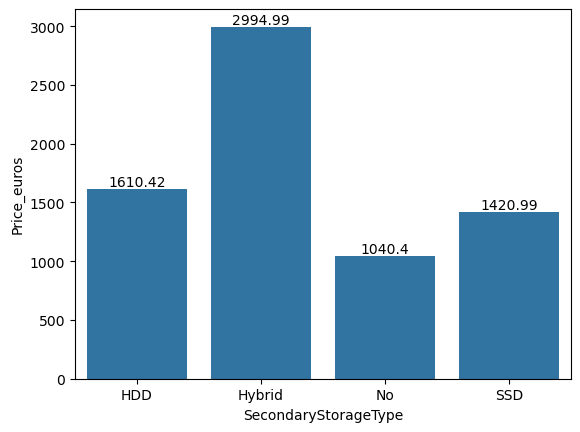

In [37]:
Secondary_Storage_Type = data.groupby(by='SecondaryStorageType')['Price_euros'].mean().reset_index()
ax=sb.barplot(x='SecondaryStorageType',y='Price_euros',data=Secondary_Storage_Type,errwidth=0)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1025.44'), Text(0, 0, '1416.61')]

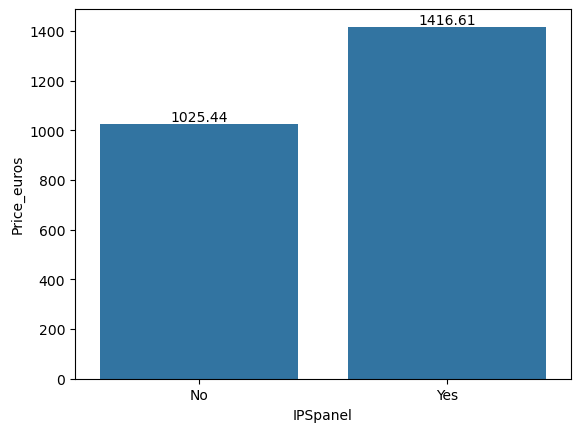

In [38]:
IPS_panel = data.groupby(by='IPSpanel')['Price_euros'].mean().reset_index()
ax=sb.barplot(x='IPSpanel',y='Price_euros',data=IPS_panel,errwidth=0)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1127.9'), Text(0, 0, '1657.85')]

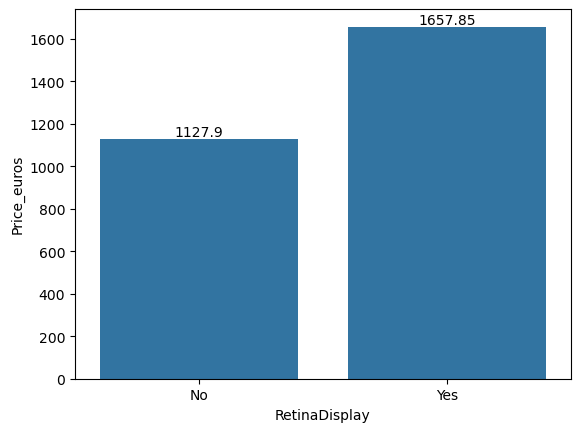

In [39]:
Retina_Display = data.groupby(by='RetinaDisplay')['Price_euros'].mean().reset_index()
ax=sb.barplot(x='RetinaDisplay',y='Price_euros',data=Retina_Display,errwidth=0)
ax.bar_label(ax.containers[0])

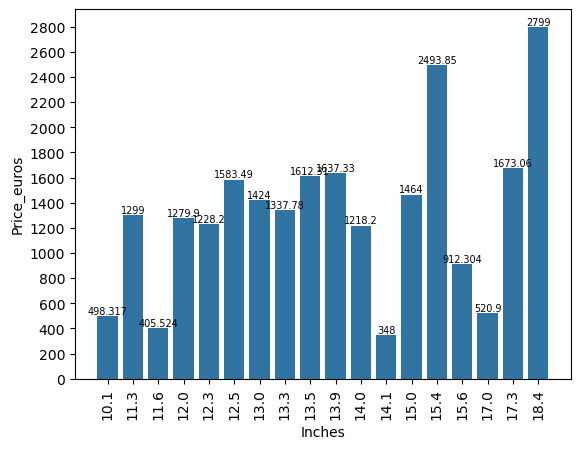

In [40]:
price_by_inches = data.groupby(by='Inches')['Price_euros'].mean().reset_index()
ax=sb.barplot(x='Inches',y='Price_euros',data=price_by_inches,errwidth=0)
ax.bar_label(ax.containers[0],fontsize=7)
plt.xticks(rotation=90)
plt.locator_params(nbins=20)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Android'),
  Text(1, 0, 'Chrome OS'),
  Text(2, 0, 'Linux'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'No OS'),
  Text(5, 0, 'Windows 10'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Windows 7'),
  Text(8, 0, 'macOS')])

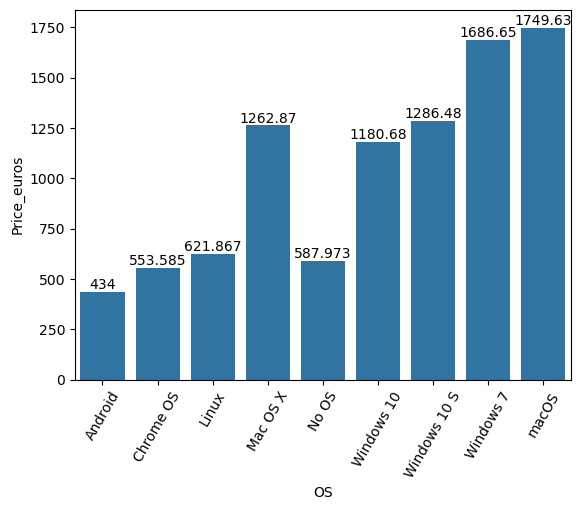

In [41]:
os = data.groupby(by='OS')['Price_euros'].mean().reset_index()
ax=sb.barplot(x='OS',y='Price_euros',data=os,errwidth=0)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=60)

[Text(0, 0, '2424.76'),
 Text(0, 0, '1231.2'),
 Text(0, 0, '1616.95'),
 Text(0, 0, '730.325')]

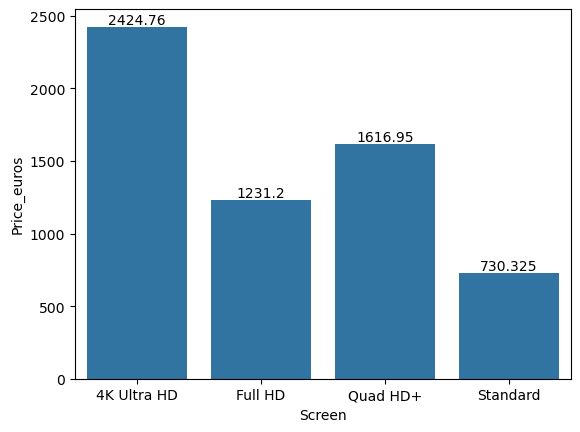

In [42]:
screen = data.groupby(by='Screen')['Price_euros'].mean().reset_index()
ax=sb.barplot(x='Screen',y='Price_euros',data=screen,errwidth=0)
ax.bar_label(ax.containers[0])

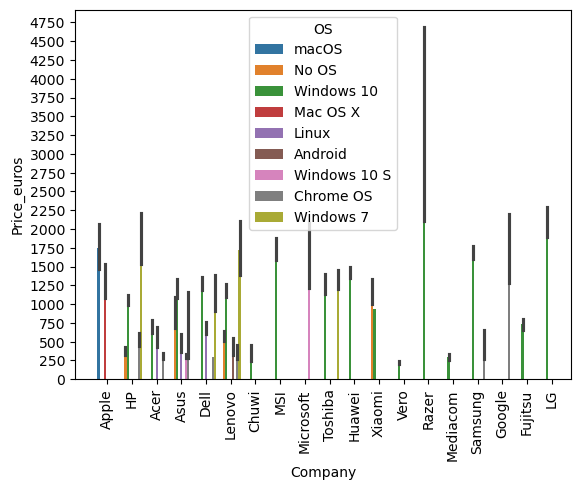

In [43]:
sb.barplot(x='Company',y='Price_euros',data=data,hue=data['OS'])
plt.xticks(rotation=90)
plt.locator_params(nbins=20)

<Axes: xlabel='Ram', ylabel='Price_euros'>

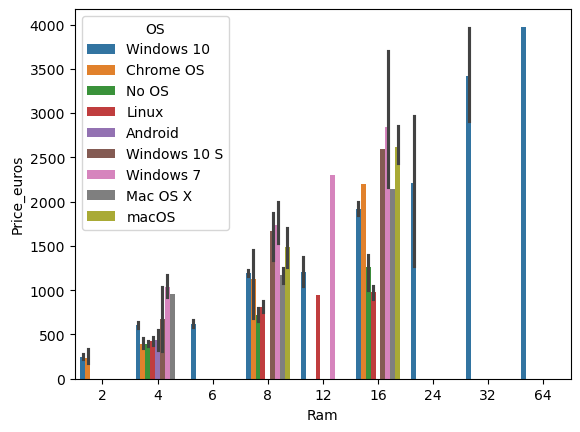

In [44]:
sb.barplot(x='Ram',y='Price_euros',data=data,hue='OS')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

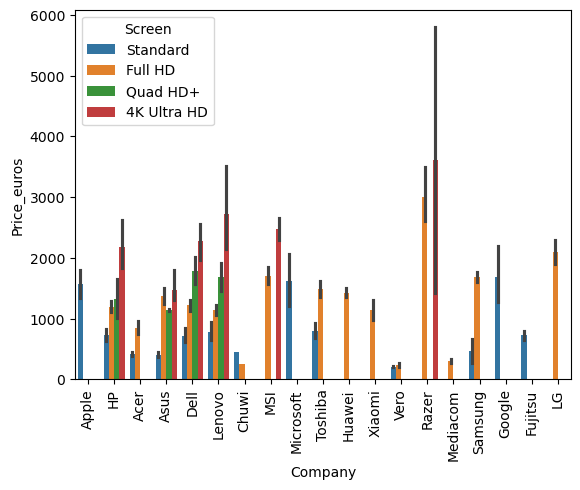

In [45]:
sb.barplot(x='Company',y='Price_euros',data=data,hue='Screen')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

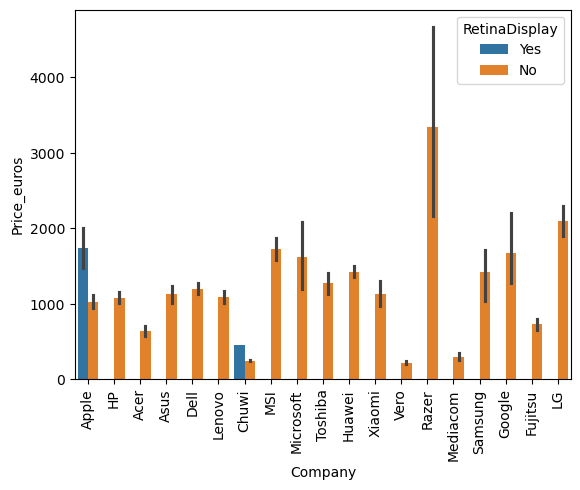

In [46]:
sb.barplot(x='Company',y='Price_euros',data=data,hue='RetinaDisplay')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

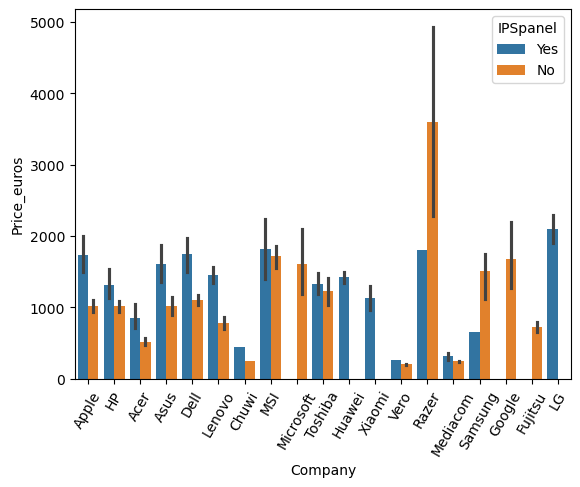

In [47]:
sb.barplot(x='Company',y='Price_euros',data=data,hue='IPSpanel')
plt.xticks(rotation=60)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

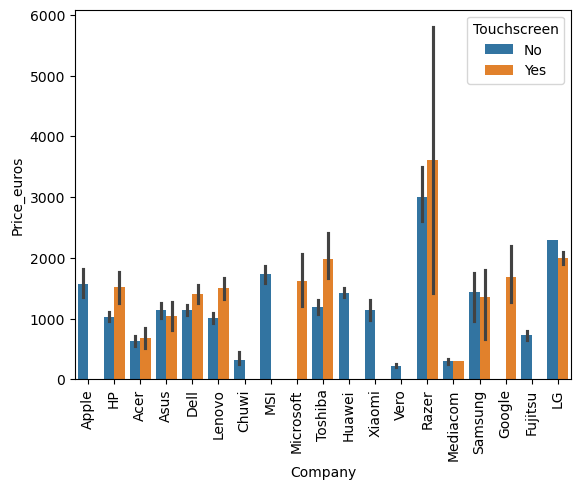

In [48]:
sb.barplot(x='Company',y='Price_euros',data=data,hue='Touchscreen')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

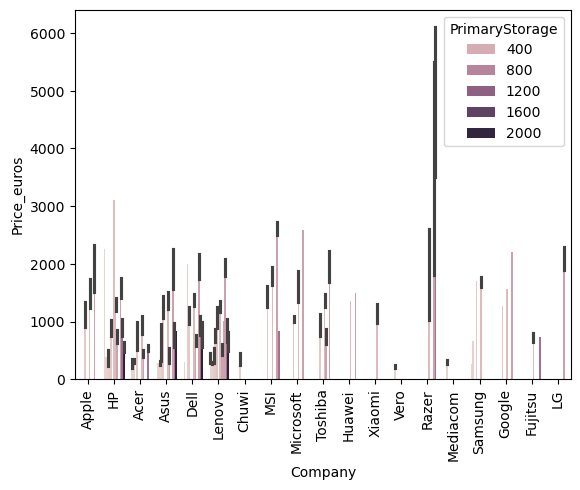

In [49]:
sb.barplot(x='Company',y='Price_euros',data=data,hue='PrimaryStorage')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

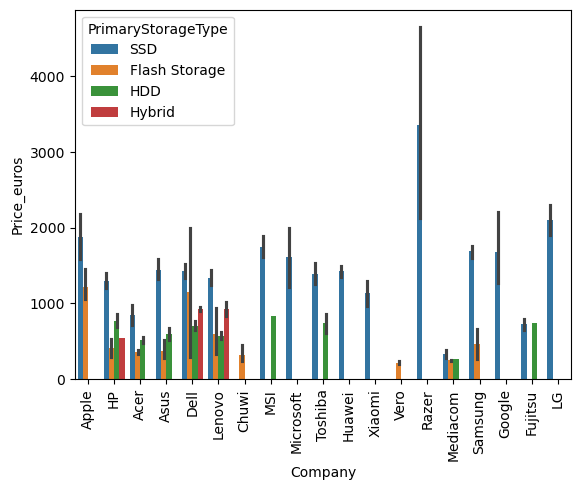

In [50]:
sb.barplot(x='Company',y='Price_euros',data=data,hue='PrimaryStorageType')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

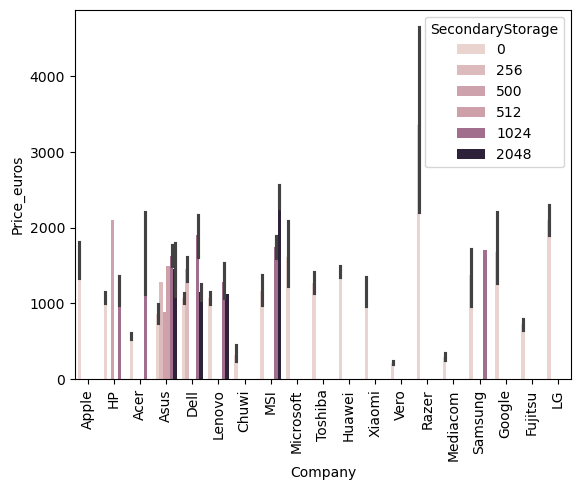

In [51]:
sb.barplot(x='Company',y='Price_euros',data=data,hue='SecondaryStorage')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

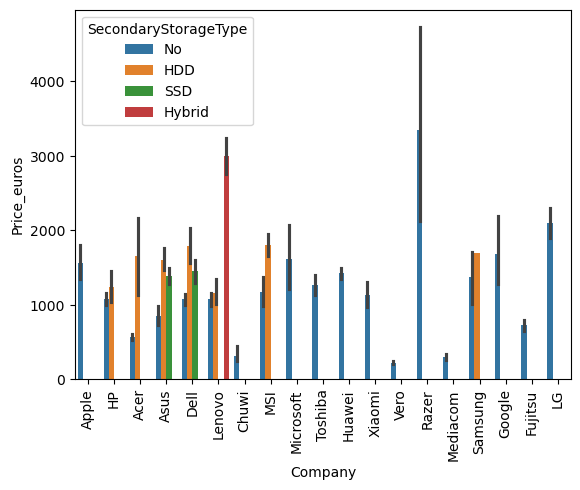

In [52]:
sb.barplot(x='Company',y='Price_euros',data=data,hue='SecondaryStorageType')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

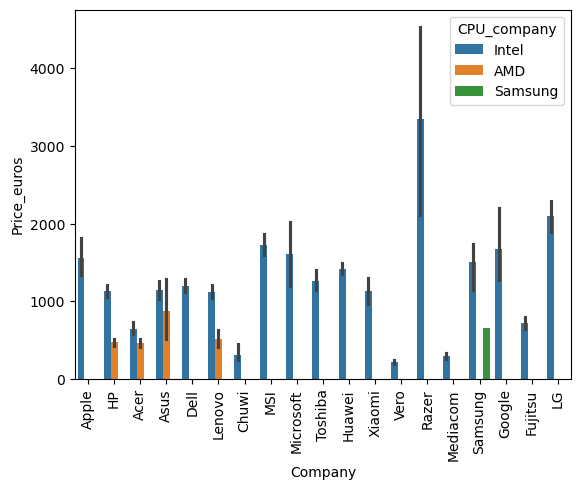

In [53]:
sb.barplot(x='Company',y='Price_euros',data=data,hue='CPU_company')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

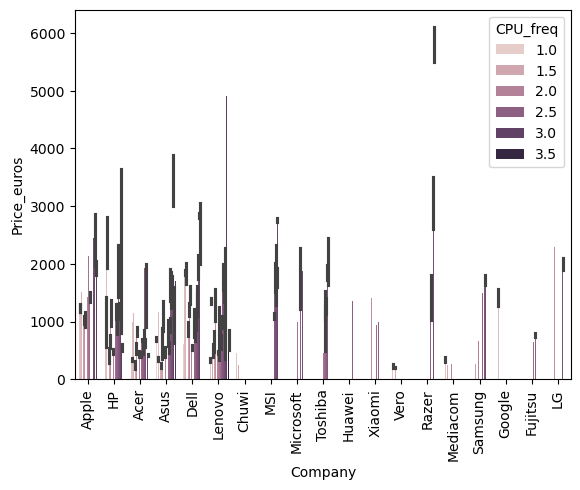

In [54]:
sb.barplot(x='Company',y='Price_euros',data=data,hue='CPU_freq')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

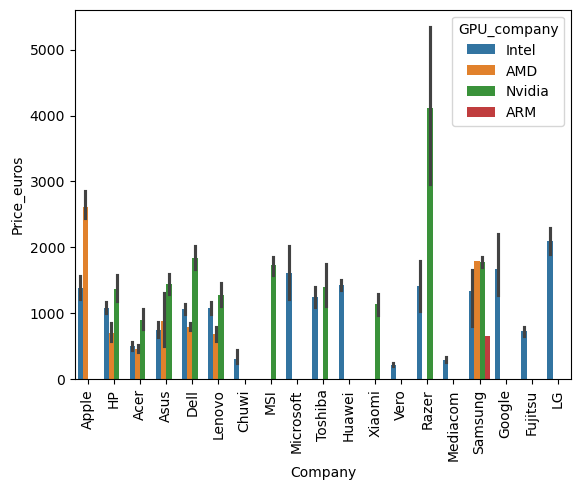

In [55]:
sb.barplot(x='Company',y='Price_euros',data=data,hue='GPU_company')
plt.xticks(rotation=90)

In [56]:
def recommend_products(budget):
    # Filter products within the budget
    affordable_products = data[data['Price_euros'] <= budget]
    
    # Sort the affordable products by the company in descending order
    top_products = affordable_products.sort_values(by='Company').head(10)
    
    return top_products[['Company', 'TypeName', 'Product']]

In [57]:
budget = int(input("Please enter your budget: "))

Please enter your budget:  250


In [58]:
recommendations = recommend_products(budget)
print("Top 10 recommended products within your budget:")
print(recommendations)

Top 10 recommended products within your budget:
     Company  TypeName                               Product
1215    Acer   Netbook      C740-C9QX (3205U/2GB/32GB/Chrome
290     Acer  Notebook                  Chromebook C910-C2ST
1102    Acer  Notebook                         Chromebook 15
20      Asus   Netbook                       Vivobook E200HA
31      Asus  Notebook  E402WA-GA010T (E2-6110/2GB/32GB/W10)
515     Asus   Netbook                          VivoBook E12
555     Asus  Notebook  A541NA-GO342 (N3350/4GB/500GB/Linux)
30     Chuwi  Notebook                         LapBook 15.6"
483    Chuwi  Notebook                          Lapbook 15,6
67        HP  Notebook                     Stream 14-AX040wm


In [59]:
def recommend_products(budget):
    # Filter products within the budget
    affordable_products1 = data[data['RetinaDisplay'] == 'Yes']
    
    # Sort the affordable products by the company
    top_products = affordable_products1.sort_values(by='Company').head(10)
    
    return top_products[['Company', 'TypeName','Product']]

In [60]:
budget = int(input("Please enter your budget: "))

Please enter your budget:  350


In [61]:
recommendations1 = recommend_products(budget)
print("Top 10 recommended products within your budget:")
print(recommendations1)

Top 10 recommended products within your budget:
     Company   TypeName      Product
0      Apple  Ultrabook  MacBook Pro
1069   Apple  Ultrabook  MacBook 12"
794    Apple  Ultrabook  MacBook 12"
270    Apple  Ultrabook  MacBook Pro
249    Apple  Ultrabook  MacBook Pro
81     Apple  Ultrabook  MacBook 12"
1193   Apple  Ultrabook  MacBook 12"
45     Apple  Ultrabook  MacBook Pro
15     Apple  Ultrabook  MacBook Pro
14     Apple  Ultrabook  MacBook 12"
